In [10]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.style.use('ggplot')

### Getting the elnino dataset to fit a distribution to it

In [4]:
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

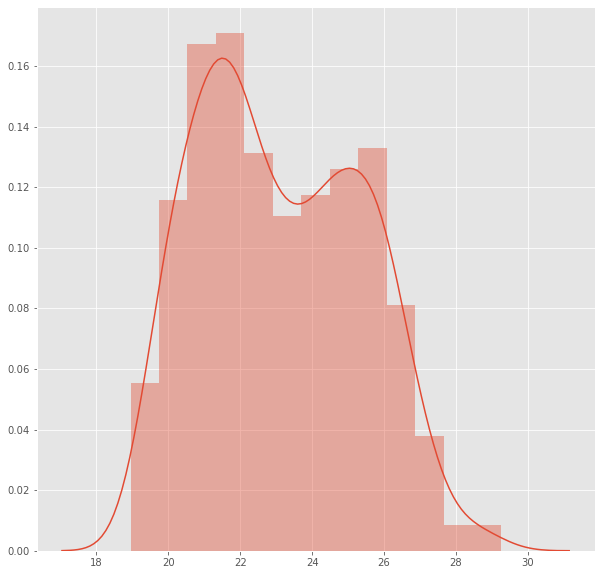

In [11]:
sns.distplot(data)

In [24]:
parameters = st.norm.fit(data)

print("mean, std.dev: ", parameters)

mean, std.dev:  (23.09262295081967, 2.2443681683984593)


### Look up the KS table

In [28]:
ks_table = st.kstest(data, "norm", parameters)

### looking at the KS table

In [29]:
p_value = ks_table[1]/np.sqrt(len(data))

print(p_value)

5.291208517201392e-06


### Look up the KS table after fitting the data
Lower the p value better the fit

In [37]:
DISTRIBUTIONS = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi',\
                 'chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow',\
                 'f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic',\
                 'genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic',\
                 'gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm',\
                 'hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace',\
                 'levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke',\
                 'nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm',\
                 'rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon',\
                 'truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

results = []

for dist in DISTRIBUTIONS:
    dist_ = getattr(st, dist)
    param = dist_.fit(data)
    kstest = st.kstest(data, dist, args=param)
    results.append((dist,kstest[0],kstest[1]))

<ipython-input-37-cfb457ae96dd>:16: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  param = dist_.fit(data)
<ipython-input-37-cfb457ae96dd>:16: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  param = dist_.fit(data)


In [41]:
results.sort(key=lambda x:float(x[2]), reverse=True)

p_values = []

for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))
    p_values.append(j[2]/np.sqrt(len(data)))

gausshyper: statistic=0.04094564877407825, pvalue=0.16706517884713523
beta: statistic=0.043235718541617674, pvalue=0.12581576796646943
johnsonsb: statistic=0.04431498658903821, pvalue=0.10948328782404126
dgamma: statistic=0.051649967284787934, pvalue=0.03885229011602209
gompertz: statistic=0.052491807954295255, pvalue=0.03414925799689872
mielke: statistic=nan, pvalue=nan
triang: statistic=0.05522500895696436, pvalue=0.02214193607678325
exponweib: statistic=0.056890681848150215, pvalue=0.01682155311379741
gengamma: statistic=0.0589166676445656, pvalue=0.01191035147527745
rice: statistic=0.06102282145560889, pvalue=0.008212820246617044
maxwell: statistic=0.06404394460502716, pvalue=0.004710141526879334
frechet_l: statistic=0.06568368766098742, pvalue=0.0034442601106409315
weibull_max: statistic=0.06568368766098742, pvalue=0.0034442601106409315
genextreme: statistic=0.06568607019793615, pvalue=0.003442674191650908
rayleigh: statistic=0.06667093885956632, pvalue=0.0028417955974924447
nct: 